# Weather vs. Crime in Los Angeles (2023)

This notebook analyzes whether temperature affects crime rates in Los Angeles using LAPD crime data and weather data for 2023.

## Step 1: Load the Data
We begin by loading the 2023 LAPD crime data and corresponding weather data for Los Angeles.

In [3]:
import pandas as pd

# Load the datasets
crime_df = pd.read_csv('crime_data_2023.csv')
weather_df = pd.read_csv('weather_data_2023.csv')

# Preview the data
crime_df.head(), weather_df.head()


(       DR_NO      Date Rptd       DATE OCC  TIME OCC  Crm Cd  \
 0  230104335  1/5/2023 0:00  1/1/2023 0:00      2030     510   
 1  231804197  1/3/2023 0:00  1/1/2023 0:00       100     354   
 2  231204066  1/1/2023 0:00  1/1/2023 0:00      2245     210   
 3  231204069  1/2/2023 0:00  1/1/2023 0:00       225     236   
 4  231204028  1/1/2023 0:00  1/1/2023 0:00      1235     230   
 
                                       Crm Cd Desc  \
 0                                VEHICLE - STOLEN   
 1                               THEFT OF IDENTITY   
 2                                         ROBBERY   
 3           INTIMATE PARTNER - AGGRAVATED ASSAULT   
 4  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
 
                          Mocodes  
 0                            NaN  
 1                      0100 1822  
 2  0202 0216 2018 1822 0315 0344  
 3  2000 1823 0913 1310 1309 1203  
 4  0430 1822 0342 1100 1309 0906  ,
        time  temperature_2m_max (°F)
 0  1/1/2023               

## Step 2: Clean and Merge Data
We clean the date fields and merge the datasets on the date column to align daily crime counts with corresponding temperature values.

In [6]:
# Rename columns
weather_df.rename(columns={
    'time': 'date',
    'temperature_2m_max (°F)': 'temperature'
}, inplace=True)

# Convert to datetime.date
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Convert date fields
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])
crime_df['crime_date'] = crime_df['DATE OCC'].dt.date

# Aggregate daily crime counts
daily_crime = crime_df.groupby('crime_date').size().reset_index(name='crime_count')

# Clean weather data
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Merge both datasets
merged_df = pd.merge(daily_crime, weather_df, left_on='crime_date', right_on='date')
merged_df.drop(columns=['date'], inplace=True)

merged_df.head()


,crime_date,crime_count,temperature
0,2023-01-01,1160,59.8
1,2023-01-02,836,56.1
2,2023-01-03,836,56.9
3,2023-01-04,673,60.2
4,2023-01-05,560,62.1


## Step 3: Visualize the Relationship
We create a scatterplot to explore the relationship between daily temperature and crime counts.

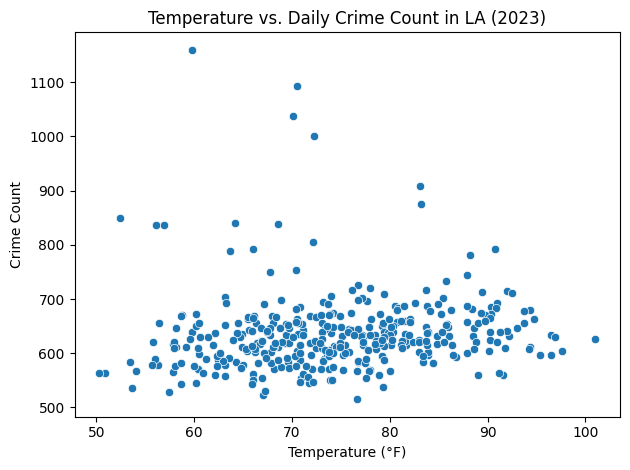

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatterplot
sns.scatterplot(x='temperature', y='crime_count', data=merged_df)
plt.title('Temperature vs. Daily Crime Count in LA (2023)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Crime Count')
plt.tight_layout()
plt.show()

## Step 4: Correlation and Regression Analysis
We calculate the correlation coefficient and run a linear regression to quantify the relationship.

In [8]:
import statsmodels.api as sm

# Correlation
correlation = merged_df['temperature'].corr(merged_df['crime_count'])
print(f'Correlation between temperature and crime count: {correlation:.3f}')

# Linear Regression
X = sm.add_constant(merged_df['temperature'])
y = merged_df['crime_count']
model = sm.OLS(y, X).fit()

print(model.summary())


Correlation between temperature and crime count: 0.089
                            OLS Regression Results                            
Dep. Variable:            crime_count   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.869
Date:                Thu, 17 Apr 2025   Prob (F-statistic):             0.0911
Time:                        10:37:33   Log-Likelihood:                -2081.8
No. Observations:                 365   AIC:                             4168.
Df Residuals:                     363   BIC:                             4175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------